**Importando bibliotecas**

In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

**Criando base**
 
Para facilitar, vamos criar dois conjunto de dados, que serão: 
 
- A primeira será uma distribuição uniforme continuo -> $U[-100;100]$, e;
- A segunda será uma distribuição normal -> $N[0;25]$.

In [16]:
dados= {"Uniforme": [random.uniform(-100,100) for x in range(25)],
        "Normal": [random.normalvariate(0, 25) for x in range(25)]}
df= pd.DataFrame(dados)
df.head()

,Uniforme,Normal
0,49.942283,12.785342
1,-6.519136,-17.614663
2,-57.455992,40.332299
3,20.872338,2.529633
4,70.823509,-10.404219


**Visualizando dados**

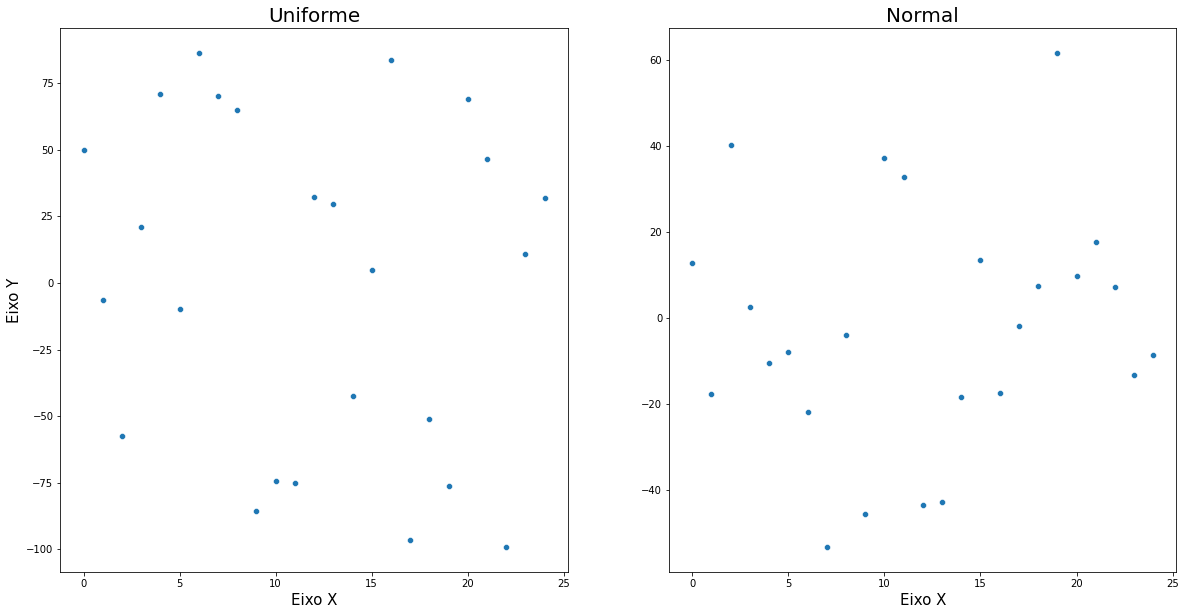

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Uniforme", ax=axes[0])
g1.set_title("Uniforme", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= df, x= range(0,25), y= "Normal", ax=axes[1])
g2.set_title("Normal", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("")

plt.show()

**MaxAbsScaler**
 
Agora, vamos falar sobre o método MaxAbsScaler. O modelo dimensiona os dados, o que causa a mudança da sua escala. A sua vantagem é que não altera a dispersão dos dados, e por isso temos uma mudança na escala e a perversão da dispersão. 
 
Esse modelo segue a seguinte estrutura.
 
- Achar o maior número absoluto dentro de um conjunto de dados, e.
 
- Dividir todos os números por o maior número absoluto.
 
Ex.
 
Dados: {1, 2, 4, 6, -7}
 
Maior Número em Absoluto: 7
 
Dividir este número pelo número: {1/7, 2/7, 4/7, 6/7, -7/7}
 
resultado: {0.14, 0.28, 0.57, 0.85, -1.0}

In [26]:
def maxAbsScaler(lista):
  maior_numero= max([abs(x) for x in lista])
  lista_nova= [x/maior_numero for x in lista]

  return(lista_nova)

In [27]:
novo_U= maxAbsScaler(df['Uniforme'].to_list())
novo_N= maxAbsScaler(df['Normal'].to_list())

**Comparar os valores atualizados com os antigos**

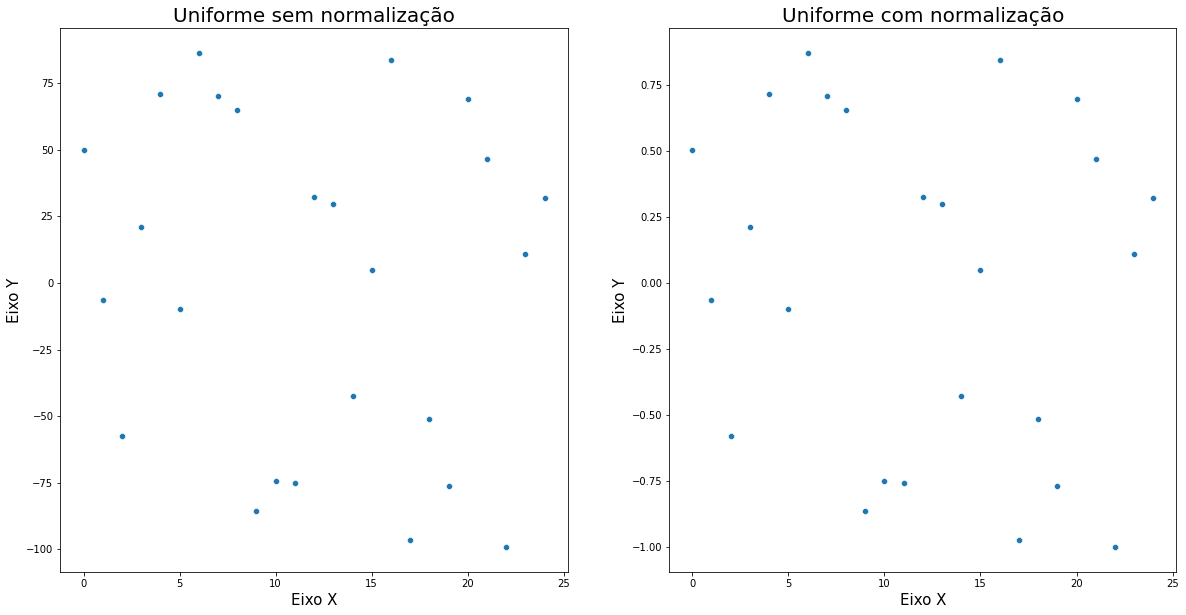

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Uniforme", ax=axes[0])
g1.set_title("Uniforme sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_U, ax=axes[1])
g2.set_title("Uniforme com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

plt.show()

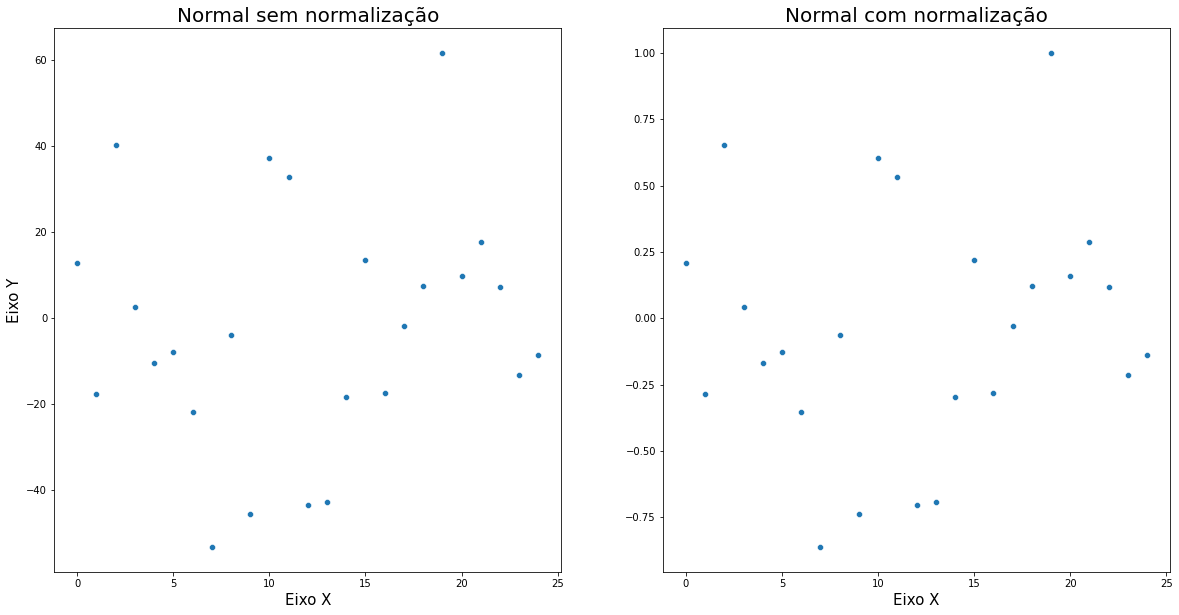

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Normal", ax=axes[0])
g1.set_title("Normal sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_N, ax=axes[1])
g2.set_title("Normal com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("")

plt.show()

**Utiliizando Sklearn**

In [31]:
from sklearn.preprocessing import MaxAbsScaler

modelo_MaxAbsScaler= MaxAbsScaler()

novo_df= pd.DataFrame(modelo_MaxAbsScaler.fit_transform(df)).rename({0:"Uniforme", 1: "Normal"}, axis= 1)
novo_df.head()

,Uniforme,Normal
0,0.503520,0.207389
1,-0.065726,-0.285724
2,-0.579274,0.654223
3,0.210436,0.041033
4,0.714046,-0.168765


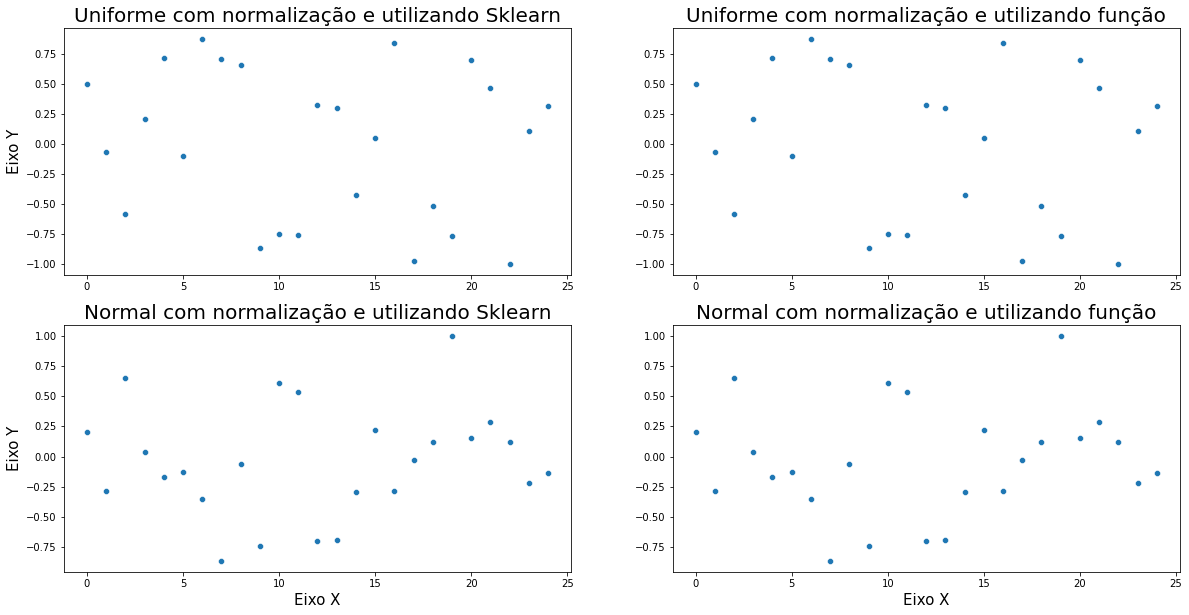

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= novo_df, x= range(0,25), y= "Uniforme", ax=axes[0,0])
g1.set_title("Uniforme com normalização e utilizando Sklearn", fontsize= 20)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_U, ax=axes[0,1])
g2.set_title("Uniforme com normalização e utilizando função", fontsize= 20)


g3= sns.scatterplot(data= novo_df, x= range(0,25), y= "Normal", ax=axes[1,0])
g3.set_title("Normal com normalização e utilizando Sklearn", fontsize= 20)
g3.set_xlabel("Eixo X", fontsize= 15)
g3.set_ylabel("Eixo Y", fontsize= 15)

g4= sns.scatterplot(data= novo_N, ax=axes[1,1])
g4.set_title("Normal com normalização e utilizando função", fontsize= 20)
g4.set_xlabel("Eixo X", fontsize= 15)
g4.set_ylabel("", fontsize= 15)

plt.show()